In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-dataset/PNB_5Y.csv
/kaggle/input/bank-dataset/UNIONBANK_5Y.csv
/kaggle/input/bank-dataset/BOI_5Y.csv
/kaggle/input/bank-dataset/SBIN_5Y.csv


In [78]:
df = pd.read_csv("../input/bank-dataset/SBIN_5Y.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,197.449997,202.600006,197.100006,198.899994,195.314117,23623536.0
1,2016-06-07,200.449997,211.149994,200.149994,210.149994,206.361298,66063192.0
2,2016-06-08,210.149994,211.899994,207.550003,210.699997,206.901398,35163093.0
3,2016-06-09,210.000000,212.800003,208.300003,209.949997,206.164902,27858182.0
4,2016-06-10,209.350006,211.500000,205.300003,205.949997,202.237015,25598224.0


In [79]:
sbi_df = df
close = df["Close"]
close.shape
close
close = close.dropna()
close.shape

(1232,)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tmp = scaler.fit(np.array(close).reshape(-1,1))
new_df = scaler.transform(np.array(close).reshape(-1,1))

 
print(new_df)

[[0.16637808]
 [0.20533238]
 [0.20723682]
 ...
 [0.99168977]
 [1.        ]
 [0.97905129]]


In [81]:
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)

(825, 1)
(407, 1)


In [82]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [83]:
n_steps = 50

In [84]:
time_step=n_steps
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train, Y_train)

(774, 50) (774,) (356, 50) (356,)


In [85]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)
#print(X_train, Y_train)

(774, 50, 1) (356, 50, 1)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(60,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(60,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 60)            14880     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 60)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50, 60)            29040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50, 60)            29040     
_________________________________________________________________
lstm_11 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [87]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
25/25 [==============================] - 11s 198ms/step - loss: 0.0481 - val_loss: 0.0282
Epoch 2/200
25/25 [==============================] - 3s 120ms/step - loss: 0.0047 - val_loss: 0.0238
Epoch 3/200
25/25 [==============================] - 3s 127ms/step - loss: 0.0043 - val_loss: 0.0183
Epoch 4/200
25/25 [==============================] - 3s 131ms/step - loss: 0.0042 - val_loss: 0.0150
Epoch 5/200
25/25 [==============================] - 3s 130ms/step - loss: 0.0038 - val_loss: 0.0133
Epoch 6/200
25/25 [==============================] - 3s 122ms/step - loss: 0.0036 - val_loss: 0.0112
Epoch 7/200
25/25 [==============================] - 3s 114ms/step - loss: 0.0032 - val_loss: 0.0112
Epoch 8/200
25/25 [==============================] - 3s 116ms/step - loss: 0.0029 - val_loss: 0.0094
Epoch 9/200
25/25 [==============================] - 3s 131ms/step - loss: 0.0030 - val_loss: 0.0096
Epoch 10/200
25/25 [==============================] - 3s 120ms/step - loss: 0.0027 - val_l

In [88]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)

(774, 1) (356, 1)


In [89]:
from sklearn.metrics import mean_squared_error
print(f'Train error - {mean_squared_error(train_predict, Y_train)*100}')
print(f'Test error - {mean_squared_error(test_predict, Y_test)*100}')

Train error - 0.043395414262767246
Test error - 0.13229675741816227


In [90]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)

[[328.84012]
 [335.73007]
 [332.75122]
 [332.39026]
 [333.13965]
 [337.58054]
 [332.31332]
 [319.27982]
 [318.15048]
 [319.23816]
 [328.3766 ]
 [329.5239 ]
 [328.23505]
 [326.13647]
 [323.0003 ]
 [322.21176]
 [317.28738]
 [313.38626]
 [312.87863]
 [314.94513]
 [321.2605 ]
 [321.73074]
 [314.68546]
 [313.89688]
 [315.3783 ]
 [310.03775]
 [317.17642]
 [298.60748]
 [305.13666]
 [310.25223]
 [320.12762]
 [318.2109 ]
 [316.73206]
 [322.78354]
 [319.06265]
 [326.2635 ]
 [318.71777]
 [314.1068 ]
 [317.3427 ]
 [319.83426]
 [326.36917]
 [321.62827]
 [325.55038]
 [326.94803]
 [321.24954]
 [304.1394 ]
 [288.82993]
 [290.0929 ]
 [286.6625 ]
 [288.90768]
 [272.46262]
 [255.30513]
 [246.33583]
 [219.8804 ]
 [240.82552]
 [232.93216]
 [222.76524]
 [221.12737]
 [212.90433]
 [216.3045 ]
 [197.34572]
 [192.39684]
 [199.88606]
 [205.98924]
 [209.00336]
 [202.04391]
 [206.01906]
 [200.67616]
 [190.71164]
 [195.40607]
 [197.1481 ]
 [200.50285]
 [198.44035]
 [196.1111 ]
 [199.51012]
 [204.27087]
 [204.60094]

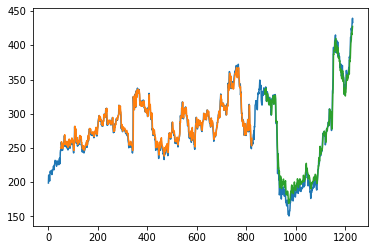

In [91]:
X = scaler.fit_transform(np.array(close).reshape(-1,1))
import matplotlib.pyplot as plt

look_back=n_steps
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
import plotly.graph_objects as go

In [93]:
x_input=test_data[357:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<50):
    
    if(len(temp_input)>50):
        #print(len(temp_input))
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(f'yhat {yhat[0]}')
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

(1, 50)
yhat [0.9553608]
[[0.9553607702255249], [0.9399802088737488], [0.9250707626342773], [0.9086428880691528], [0.891208291053772], [0.8731321096420288], [0.854587197303772], [0.8356684446334839], [0.8164341449737549], [0.7969205975532532], [0.7771565318107605], [0.7571669816970825], [0.736973762512207], [0.716601550579071], [0.696078360080719], [0.6754430532455444], [0.6547428369522095], [0.6340370774269104], [0.6133998036384583], [0.5929232239723206], [0.5727184414863586], [0.5529140830039978], [0.5336567759513855], [0.5151065587997437], [0.4974319338798523], [0.4808005690574646], [0.4653734564781189], [0.45129576325416565], [0.43868792057037354], [0.42763787508010864], [0.41819438338279724], [0.41036635637283325], [0.4041232764720917], [0.39939916133880615], [0.3960999548435211], [0.3941081166267395], [0.3932998776435852], [0.3935394883155823], [0.3946930468082428], [0.396630197763443], [0.39923110604286194], [0.40238216519355774], [0.40597614645957947], [0.40991681814193726], [0

50


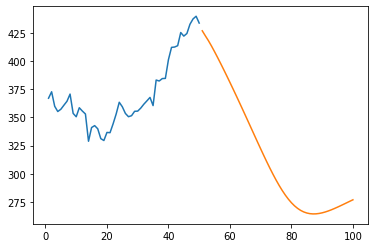

In [94]:
print(len(lst_output))
day_new=np.arange(1,51)
day_pred=np.arange(51,101)
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(new_df[1182:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [95]:
lst_output_go = scaler.inverse_transform(lst_output)
lst_output_go = pd.DataFrame(lst_output_go)
y_data = scaler.inverse_transform(new_df[1182:])
y_data = pd.DataFrame(y_data)
fig = go.Figure()
fig.add_trace(go.Scatter(x=day_new, y=y_data[0], name="1"))
fig.add_trace(go.Scatter(x=day_pred, y=lst_output_go[0], name="2"))
fig.layout.update( xaxis_rangeslider_visible=True)
fig.show()